# 03. Discovering Virtual Teams



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
#Install all related packages. If you find additional packages missing, please follow the same technique.
#If you are not using anaconda, then use pip to install the same packages

import sys
!conda install --yes --prefix {sys.prefix} networkx matplotlib

/bin/bash: conda: command not found


## 03.04. Preparing Network Data

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

from csv import reader
import pandas as pd

#Input file with one record per chat collaboration
chat_csv = "/content/drive/MyDrive/Ai in HR/chat_groups.csv"

#Data frame to store employee pairs.
employee_pairs = pd.DataFrame(columns=['First', 'Second', 'Count'])

#Read file and extract pairs and weights
with open(chat_csv, 'r', encoding="utf-8-sig") as read_obj:
    # pass the file object to reader() to get the reader object
    csv_reader = reader(read_obj)
    # Iterate over each row in the csv using reader object
    for row in csv_reader:
        #Sort by employee name
        row.sort()
        #sort and filter for only valid names
        filtered_row = [ emp for emp in row
                        if len(emp) > 0] 

        #Generate employee pairs
        
        #Iterate for the first employee
        for i in range(0, len(filtered_row)-1):
            #Iterate for the second employee
            for j in range(i+1,len(filtered_row) ):
            
                first=filtered_row[i]
                second=filtered_row[j]

                #Create the pair record. If Dataframe record already exists
                #Update the count. If not, create it
                curr_rec = employee_pairs[
                                (employee_pairs['First'] == first )
                                & (employee_pairs['Second'] == second)]

                if ( curr_rec.empty) :
                    new_df = pd.DataFrame([{'First': first,
                                            'Second' : second,
                                            'Count':1}])
                    employee_pairs=employee_pairs.append(new_df,
                                                         ignore_index=True)

                else:
                    curr_rec.at[curr_rec.index[0],'Count'] = curr_rec.at[curr_rec.index[0],'Count'] + 1
                    employee_pairs.update(curr_rec)
                
print(employee_pairs)

    First Second Count
0    Jeff  Stacy     7
1    Jeff    Rob     4
2    Emma   Jeff     6
3    Emma    Rob     3
4    Emma  Stacy     4
5     Rob  Stacy     4
6    Emma   Mike     3
7    Jeff   Mike     5
8    Mike    Rob     3
9    Mike  Stacy     5
10   Jeff   Lisa     5
11   Emma   Lisa     2
12   Emma  Mason     1
13   Jeff  Mason     2
14   Lisa  Mason     6
15   Lisa   Mike     2
16  Mason   Mike     2
17   Lisa  Stacy     2
18  David   Jeff     1
19  David   Lisa     6
20  David  Stacy     1
21  David  Mason     4
22  David  Sofia     3
23   Lisa  Sofia     4
24  Mason  Sofia     3


## 03.05. Create and visualize the network

In [4]:

#Create a networkX graph
graph_emps  = nx.Graph()

#Add Edges based on the dataframe (nodes gets added automatically)
for i,row in employee_pairs.iterrows():
    graph_emps.add_edge(row['First'],  
                        row['Second'],   
                        weight=row['Count'])


#Print network summary
print("Network summary: \n-----------------\n", nx.info(graph_emps))


Network summary: 
-----------------
 Name: 
Type: Graph
Number of nodes: 9
Number of edges: 25
Average degree:   5.5556


findfont: Font family ['Consolas'] not found. Falling back to DejaVu Sans.


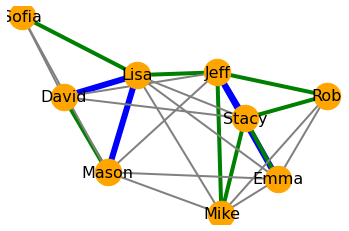

In [5]:
# Create different types of edges based on their cohesion

#Pairs with Count > 5 for high cohesion
elarge = [(x1, x2) for (x1, x2, data) in graph_emps.edges(data=True) 
          if data['weight'] > 5]

#Pairs with Count between 4 and 5 for medium cohesion
emedium = [(x1, x2) for (x1, x2, data) in graph_emps.edges(data=True) 
          if  3 < data['weight'] <= 5]

#Pairs with Count less than 4 for low cohesion
esmall = [(x1, x2) for (x1, x2, data) in graph_emps.edges(data=True) 
          if data['weight'] <= 3]

pos = nx.spring_layout(graph_emps)  # positions for all nodes

## Setup the Graph
# nodes
nx.draw_networkx_nodes(graph_emps, pos, 
                       node_size=700,
                       node_color='orange')


nx.draw_networkx_edges(graph_emps, pos, 
                       edgelist=elarge,
                       width=6,
                       edge_color='blue')

nx.draw_networkx_edges(graph_emps, pos, 
                       edgelist=emedium,
                       width=4,
                       edge_color='green')

nx.draw_networkx_edges(graph_emps, pos, 
                       edgelist=esmall,
                       width=2, 
                       edge_color='gray')

# labels
nx.draw_networkx_labels(graph_emps, 
                        pos, 
                        font_size=16, 
                        font_family='Consolas')


plt.axis('off')
plt.show();

## 03.06. Analyzing the network

In [6]:
#Function to sort a dictionary by value
def sort_dict(dict):
    sorted_dict= sorted(dict.items(), key=lambda x: x[1],reverse=True)
    
    for key,value in sorted_dict:
        print(key, " = ", value)


#find number of nodes they are connected with
print("\nNodes Mason is connected with :\n-------------------------------")
print(nx.degree(graph_emps,'Mason'))

#clustering - how close a team they form
print("\nClustering Co-efficient:\n----------------------")
sort_dict(nx.clustering(graph_emps,weight='weight'))

#Find centrality of nodes
print("\nCentrality :\n---------------")
sort_dict(nx.degree_centrality(graph_emps))

print("\nBetweenness:\n--------------")
sort_dict(nx.betweenness_centrality(graph_emps))



Nodes Mason is connected with :
-------------------------------
6

Clustering Co-efficient:
----------------------
Rob  =  0.5582006819632447
Sofia  =  0.553441073385821
Stacy  =  0.39003294041518044
Mike  =  0.38974635553194825
Jeff  =  0.3819529217453334
Emma  =  0.3793204320130199
Lisa  =  0.3217084828550027
David  =  0.3144738551035592
Mason  =  0.29155561566514554

Centrality :
---------------
Jeff  =  0.875
Lisa  =  0.875
Stacy  =  0.75
Emma  =  0.75
Mike  =  0.75
Mason  =  0.75
David  =  0.625
Rob  =  0.5
Sofia  =  0.375

Betweenness:
--------------
Lisa  =  0.10634920634920635
Mason  =  0.07738095238095237
Jeff  =  0.07559523809523809
Stacy  =  0.05257936507936508
David  =  0.044841269841269835
Emma  =  0.03591269841269841
Mike  =  0.03591269841269841
Rob  =  0.0
Sofia  =  0.0
